# Image


In [1]:
import matplotlib.image as npim
import matplotlib.pyplot as plt
from scipy.linalg import svd
from scipy.linalg import eigh
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image

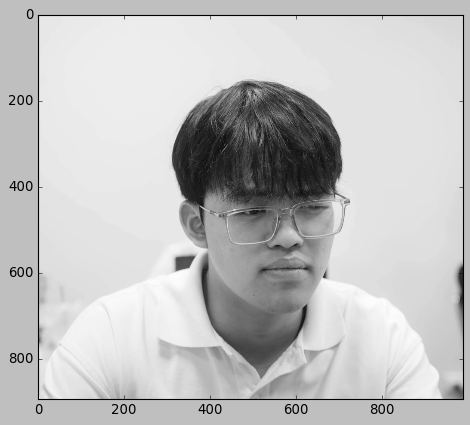

In [2]:
plt.style.use('classic')
img = Image.open('khanh.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [3]:
def pca_decomposition(imggray, vals):
    imgmat = np.array(list(imggray.getdata(band=0)), float)
    imgmat.shape = (imggray.size[1], imggray.size[0])
    cov_mat = imgmat - np.mean(imgmat )
    eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat)) # USING "eigh", SO THAT PROPRTIES OF HERMITIAN MATRIX CAN BE USED
    p = np.size(eig_vec, axis =1)
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:,idx]
    eig_val = eig_val[idx]
    # choose k dim
    if vals >0 and vals<1: # propotion
        sum_eig_val=np.sum(eig_val)
        sum_eig_val=sum_eig_val*vals
        sum_eig_k_dim=0
        k_dim=0
        while sum_eig_k_dim<=sum_eig_val:
            sum_eig_k_dim=np.sum(eig_val[:k_dim])
            k_dim+=1
        eig_vec = eig_vec[:, range(k_dim)]
    elif vals <p and vals >=1: # k component
        eig_vec = eig_vec[:, range(vals)]
    score = np.dot(eig_vec.T, cov_mat)
    recon = np.dot(eig_vec, score) #+ np.mean(imgmat, axis = 1).T # SOME NORMALIZATION CAN BE USED TO MAKE IMAGE QUALITY BETTER
    return recon

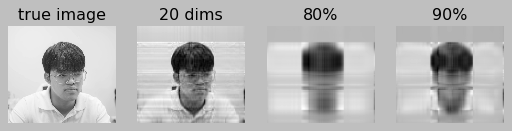

In [4]:
#  usage for pca
Mhat1 = pca_decomposition(imggray, 20)
Mhat2 = pca_decomposition(imggray, 0.8)
Mhat3 = pca_decomposition(imggray, 0.9)


fig, [ax1, ax2,ax3,ax4] = plt.subplots(1, 4)
ax1.axis('off')
ax1.imshow(imggray, cmap = plt.get_cmap('gray'))
ax1.set_title('true image')
ax2.axis('off')
ax2.imshow(Mhat1, cmap = plt.get_cmap('gray'))
ax2.set_title('20 dims')
ax3.axis('off')
ax3.imshow(Mhat2, cmap = plt.get_cmap('gray'))
ax3.set_title('80%')
ax4.axis('off')
ax4.imshow(Mhat3, cmap = plt.get_cmap('gray'))
ax4.set_title('90%')
plt.show()

(893, 988, 3)


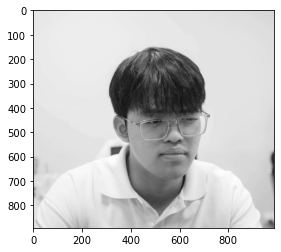

In [2]:
from matplotlib.pyplot import imread
img = imread("khanh.jpg")
img = img.astype(np.uint8)
print(img.shape)
img = img.mean(axis=2)
plt.imshow(img, cmap="gray")

In [5]:
from sklearn.decomposition import PCA
def transform(percentage):
    tswizzle_pca = PCA(n_components=percentage).fit(img)
    transformed = tswizzle_pca.transform(img)
    projected = tswizzle_pca.inverse_transform(transformed)
    return projected
#     plt.imshow(projected, cmap="gray")

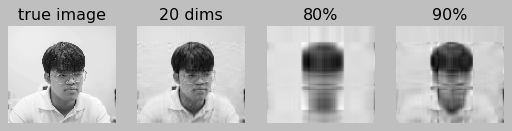

In [65]:
#  usage for pca


fig, [ax1, ax2,ax3,ax4] = plt.subplots(1, 4)
ax1.axis('off')
ax1.imshow(img, cmap="gray")
ax1.set_title('true image')
####
Mhat1 = transform(20)
ax2.axis('off')
ax2.imshow(Mhat1, cmap="gray")
ax2.set_title('20 dims')
####
Mhat2 = transform(0.8)
ax3.axis('off')
ax3.imshow(Mhat2, cmap="gray")
ax3.set_title('80%')
####
Mhat3 = transform(0.9)
ax4.axis('off')
ax4.imshow(Mhat3, cmap="gray")
ax4.set_title('90%')
plt.show()

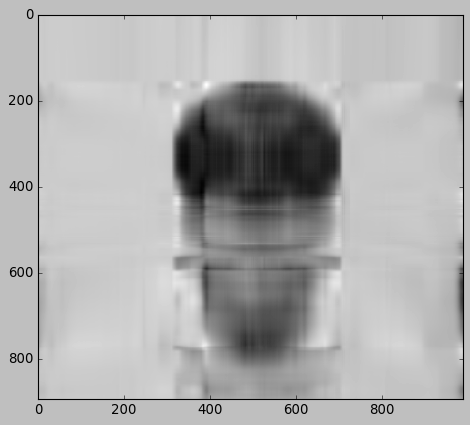

In [77]:
a=transform(0.85)
plt.imshow(a,cmap='gray')

In [10]:
img = imread("khanh3.jpg")
img = img.astype(np.uint8)
img = img.mean(axis=2)

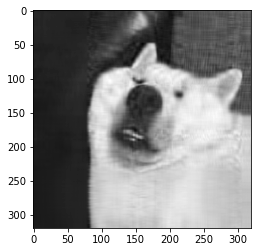

In [9]:
a=transform(0.98)
plt.imshow(a,cmap='gray')

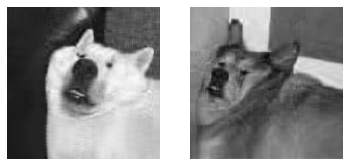

In [18]:
fig, [ax1, ax2] = plt.subplots(1, 2)
###
img = imread("khanh2.jpg")
img = img.astype(np.uint8)
img = img.mean(axis=2)
Mhat1 = transform(15)
ax1.axis('off')
ax1.imshow(Mhat1, cmap="gray")
####
img = imread("khanh3.jpg")
img = img.astype(np.uint8)
img = img.mean(axis=2)
Mhat2 = transform(15)
ax2.axis('off')
ax2.imshow(Mhat2, cmap="gray")
